In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import networkx as nx
from datetime import datetime
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import folium
from datetime import datetime
import matplotlib.dates as mdates
from pyvis.network import Network
from itertools import combinations



In [2]:
Cleaned_France = pd.read_excel("Cleaned_France_sorted_ship_voyages.xlsx")
Cleaned_UnitedKingdom = pd.read_excel("Cleaned_UnitedKingdom_sorted_ship_voyages.xlsx")
Cleaned_Spain = pd.read_excel("Cleaned_Spain_sorted_ship_voyages.xlsx")
Cleaned_Netherlands = pd.read_excel("Cleaned_Nederland_sorted_ship_voyages.xlsx")

In [3]:
combined_df = pd.concat([Cleaned_France, Cleaned_UnitedKingdom, Cleaned_Spain,Cleaned_Netherlands], ignore_index=True)

In [4]:
combined_df.to_excel("combined_df.xlsx")

In [5]:
combined_df

,Unnamed: 0,VoyageIni,VoyageFrom,VoyageTo,ShipName,MinDate,MaxDate,Duration,HomeCountry,FormattedMin,FormattedMax,FormattedMinDate,FormattedMaxDate
0,0,17750605.0,Brest France,Martinique Caribbean,Amphitrite,1775-06-05,1775-07-06,31,France,"June 05, 1775","July 06, 1775",NaN,NaN
1,1,17721225.0,Brest France,Cap-Haitien Haiti Caribbean,L'actionnaire,1772-12-25,1773-01-22,28,France,"December 25, 1772","January 22, 1773",NaN,NaN
2,2,17730428.0,Cap-Haitien Haiti Caribbean,Brest France,L'actionnaire,1773-04-28,1773-06-05,38,France,"April 28, 1773","June 05, 1773",NaN,NaN
3,3,17770409.0,Honfleur France,Grand Bank Newfoundland,L'aimable Marie Anne,1777-04-09,1777-06-22,74,France,"April 09, 1777","June 22, 1777",NaN,NaN
4,4,17771004.0,Honfleur France,Grand Bank Newfoundland,L'aimable Marie Anne,1777-10-04,1777-10-27,23,France,"October 04, 1777","October 27, 1777",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,231656,17710112,Amsterdam Netherlands,Ghana Africa,Zanggodin,1771-01-12,1771-02-18,37,Netherlands,"January 12, 1771","February 18, 1771",NaN,NaN
676,231780,17710824,Ghana Africa,Braamspunt Suriname,Zanggodin,1771-08-24,1771-11-01,69,Netherlands,"August 24, 1771","November 01, 1771",NaN,NaN
677,231785,17720125,Braamspunt Suriname,Amsterdam Netherlands,Zanggodin,1772-01-25,1772-04-08,74,Netherlands,"January 25, 1772","April 08, 1772",NaN,NaN
678,103626,17790107,Hellevoetsluis Netherlands,Braamspunt Suriname,Zephyr,1779-01-07,1779-02-21,45,Netherlands,"January 07, 1779","February 21, 1779",NaN,NaN


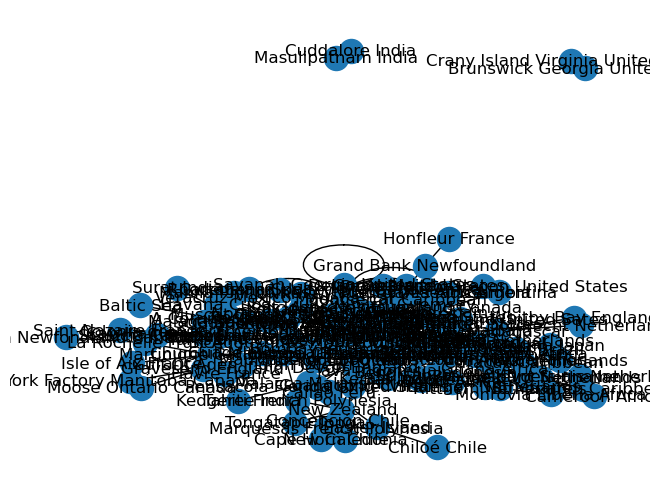

voyages.html


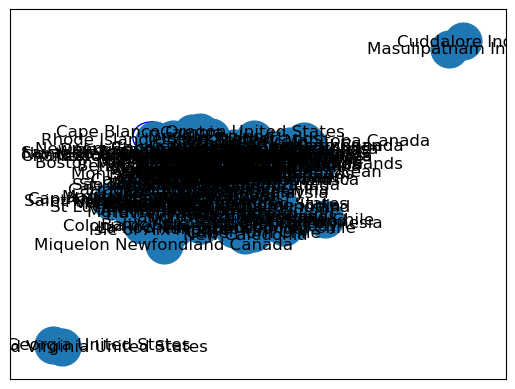

voyages.html


In [8]:
G = nx.from_pandas_edgelist(combined_df, 'VoyageFrom', 'VoyageTo')

nx.draw(G, with_labels=True)
plt.show()

net = Network(notebook=True)
net.from_nx(G)
net.show('voyages.html')

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')
nx.draw_networkx_labels(G, pos)
plt.show()


for node in G.nodes:
    net.add_node(node, title=node)

for edge in G.edges:
    net.add_edge(edge[0], edge[1])

net.show('voyages.html')

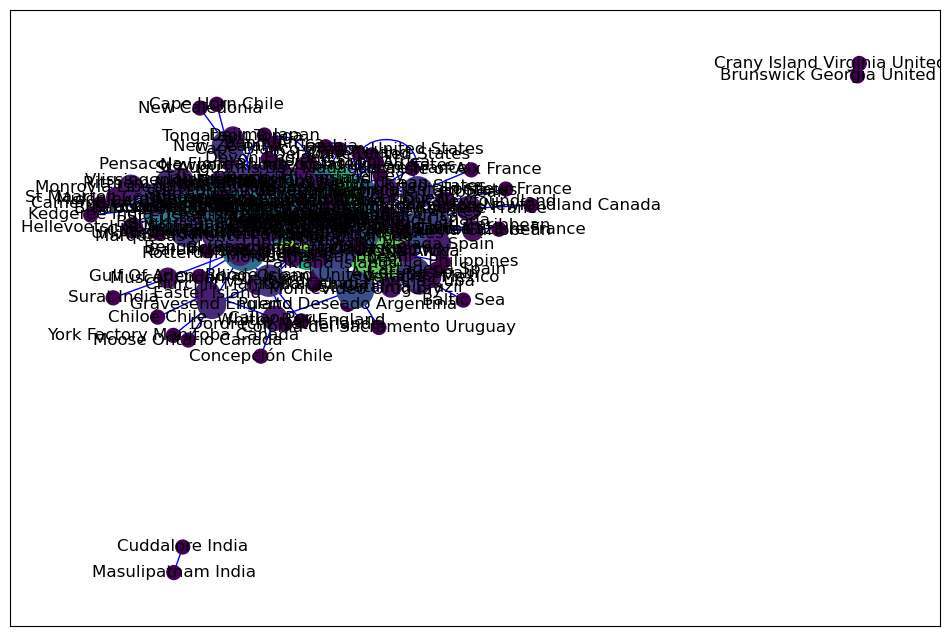

voyages.html


In [6]:
# Create a graph from the dataframe
G = nx.from_pandas_edgelist(combined_df, 'VoyageFrom', 'VoyageTo')

# Calculate node degree for size
node_size = [G.degree(node) * 100 for node in G.nodes()]

# Define node color based on degree (or any other criterion)
node_color = [G.degree(node) for node in G.nodes()]

# NetworkX Visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes with the new size and color
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='blue')
nx.draw_networkx_labels(G, pos)
plt.show()

# Pyvis Visualization (to be executed in your local environment)
net = Network(notebook=True)
net.from_nx(G)

# Add nodes with specific attributes (size, color, title)
for node in G.nodes:
    net.add_node(node, title=node, size=G.degree(node) * 10, color=plt.cm.viridis(G.degree(node)/max(node_color)))

# Add edges
for edge in G.edges:
    net.add_edge(edge[0], edge[1])

# Save and show the network
net.show('voyages.html')


In [7]:
node_list = list(G.nodes)
pos = nx.spring_layout(G)
locations = {node: pos[node] for node in G.nodes()}
coordinates_list = [pos[node] for node in G.nodes()]


In [8]:
node_list


['Brest France',
 'Martinique Caribbean',
 'Cap-Haitien Haiti Caribbean',
 'Honfleur France',
 'Grand Bank Newfoundland',
 'Cadiz Spain',
 'Malaga Spain',
 'Saint-Nazaire France',
 'La Rochelle France',
 'Turks and Caicos',
 'Isle of Aix France',
 'Havre France',
 'Guadeloupe Caribbean',
 'Mauritius Indian Ocean',
 'Miquelon Newfondland Canada',
 'St Lucia Caribbean',
 'New York United States',
 'Plymouth England',
 'Jersey',
 'Nova Scotia Canada',
 'St Johns Newfoundland Canada',
 'Portsmouth  England',
 'Lisbon Portugal',
 'London England',
 'Torbay England',
 'Madeira Portugal',
 'Cape Verde',
 'Ascension',
 'St Helena Island',
 'Antigua',
 'Tenerife Spain',
 'Newport Rhode Island United Sates',
 'Portsmouth England',
 'Cape of Good Hope South Africa',
 'Bombay India',
 'Pensacola Florida United States',
 'Kent England',
 'Yarmouth England',
 'Barbados',
 'Norfolk Virginia United States',
 'Chennai India',
 'Kerala India',
 'Jamaica',
 'Nantasket Massachusetts United States',
 'Bost

In [9]:
# Regenerating the entire graph with a new layout and without labels
plt.figure(figsize=(15, 10))

# Generating a new spring layout
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the network without labels
nx.draw_networkx_nodes(G, pos, node_size=degrees, node_color=node_color, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Displaying the graph without labels
plt.title("Voyage Network Graph (No Labels)")
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=min(node_color), vmax=max(node_color)), cmap=plt.cm.viridis), 
             label='Node Degree')
plt.axis('off')
plt.show()


NameError: name 'degrees' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# Filter the dataframe for voyages from Spain and the United Kingdom
spain_df = combined_df[combined_df['HomeCountry'] == 'Spain']
uk_df = combined_df[combined_df['HomeCountry'] == 'Netherlands']

# Extract unique locations (both 'VoyageFrom' and 'VoyageTo') for each country
spain_locations = set(pd.concat([spain_df['VoyageFrom'], spain_df['VoyageTo']]).unique())
uk_locations = set(pd.concat([uk_df['VoyageFrom'], uk_df['VoyageTo']]).unique())

# Find the common locations between Spain and the United Kingdom
common_locations = spain_locations.intersection(uk_locations)

# Count of common locations
common_locations_count = len(common_locations)

common_locations_count, common_locations



In [ ]:
# Extracting unique countries from 'HomeCountry' column
unique_countries = combined_df['HomeCountry'].unique()

# Creating a dictionary to store the count of common locations for each pair of countries
common_locations_by_countries = {}

# Iterate over all combinations of two countries
for country1, country2 in combinations(unique_countries, 2):
    # Filter dataframes for each country
    country1_df = combined_df[combined_df['HomeCountry'] == country1]
    country2_df = combined_df[combined_df['HomeCountry'] == country2]

    # Extract unique locations for each country
    country1_locations = set(pd.concat([country1_df['VoyageFrom'], country1_df['VoyageTo']]).unique())
    country2_locations = set(pd.concat([country2_df['VoyageFrom'], country2_df['VoyageTo']]).unique())

    # Find common locations and count them
    common_locations = country1_locations.intersection(country2_locations)
    common_locations_count = len(common_locations)

    # Store the count in the dictionary
    common_locations_by_countries[(country1, country2)] = common_locations_count

common_locations_by_countries




In [ ]:

# Settings for the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(country_graph, k=0.5, iterations=20)

# Draw the nodes
nx.draw_networkx_nodes(country_graph, pos, node_size=700, node_color='lightblue')

# Draw the edges with varying thickness based on the weight
for country1, country2, data in country_graph.edges(data=True):
    nx.draw_networkx_edges(country_graph, pos, edgelist=[(country1, country2)], width=data['weight'])

# Draw the labels
nx.draw_networkx_labels(country_graph, pos)

# Displaying the graph
plt.title("Common Locations Network by Home Country")
plt.axis('off')
plt.show()

